# DML Auditory Exercise 2

Welcome to the auditory exercise on **Data Modification Language (DML)**! In this session, we will dive into the concepts and practical applications of **Common Table Expressions (CTEs)**, **Views**, and **Temporary Tables**. These tools provide mechanisms to simplify complex SQL queries and manage intermediate results effectively.

When we need to solve more complex queries, we can use views, or virtual tables, to keep intermediate results we can use Views, Common Table Expressions or Temporary Tables.

Once a CTE, view, or temporary table is created it can be used in an SQL statement as any other table from the database.

## Common Table Expressions (CTEs)

A **CTE** is a temporary result set that exists only for the duration of the execution of the SQL statement. They are lightweight and provide a convenient way to manage complex queries.

### Properties and use cases:

```
• Definition based = A CTE stores only the query definition, and its result set is generated dynamically at runtime during query execution.
• Multiple CTEs = Multiple CTEs can be defined within the same query. Each subsequent CTE can reference the ones defined before it.
• Recursive capabilities = CTEs are particularly useful for creating recursive queries, which can handle hierarchial or parent-child data structures.
• Lightweight alternative to Views = A CTE is ideal when you need the functionality of a view but do not require it to be stored permanently in the database metadata.
• Flexible for Derived Columns = Enables grouping by columns derived from scalar subqueries or non - deterministic functions.
• Reusable withing the same statement = The resulting table of a CTE can be referenced multiple times within the same query.

```

### Syntax:

```
WITH expression_name [ ( column_name [,...n] ) ]
AS
( CTE_query_definition )

```

## Temporary tables

Temporary tables store data rather than just query definitions. They are particularly useful for intermediate processing of data that needs to persist during a session or the use across multiple queries.

```
• Data storage = Unlike CTEs and views, temporary tables store actual data, not just query definitions.
• Indexes and keys = They support indexes and foreign keys, allowing you to optimize and enforce data relationships.
• Their scope is in the current session of the current user (if their prefix is #) or are
stored permanently in tempdb if their name is is prefixed with ##.
• Session scope:
    • Local Temporary Tables = Prefixed with # and exist only for the current user session. They are dropped automatically when the session ends.
    • Global Temporary Tables = Prefixed with ## and persist in the tempdb database until all sessions referencing them are closed
• Creating = Creating temporary tables is performed in the same way as regular tables, with the distinction that their names have to start with #.

```

### Syntax:

```
CREATE TABLE #table_name
( table definition )

```
```
SELECT *
INTO #table_name
FROM table1
WHERE condition = 1

```

## VIEWs

A view is a virtual table that stores a query definition and provides a way to simplify query logic, enhance security, and present data in a user-friendly manner.

```
• Definition - based = Like CTEs, views store only the query definition, and the result set is dynamically calculated at runtime.
• Persistent object = Views are stored permanently in the database schema, allowing them to be used across multiple SQL statements.
• Data security = Views can limit user access to sensitive data by allowing them to interact with a predefined dataset while restricting access to the underlying tables.
• Schema independence = They can provide a consistent interface even when the underlying table schema changes, making them useful for backward compatibility.
• Custom data representation = Simplify the user’s interaction with the database by abstracting complex joins and aggregations.

```

### Syntax:

```
CREATE [OR ALTER] VIEW [schema_name.]view_name [(column [ ,...n ])]
[WITH <view_attribute>[ ,...n ]]
AS select_statement
[WITH CHECK OPTION]
[;]
<view_attribute>::=
{
[ENCRYPTION]
[SCHEMABINDING]
[VIEW_METADATA]
}

```

### Comparison of CTEs, Temporary Tables, and Views

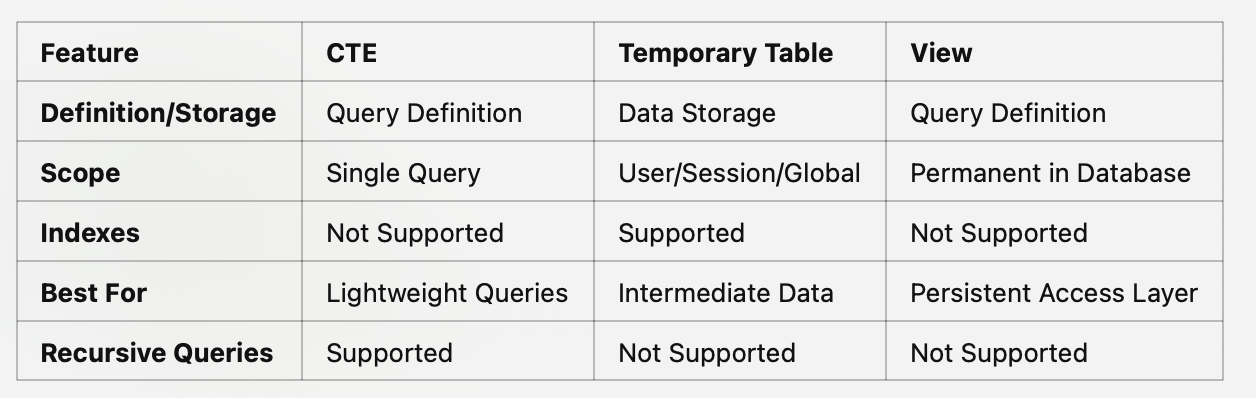

Before every auditory exercise, we make sure that the workspace is clear for the following examples. The following code cell checks if the database exists and creates it from scratch.

In [ ]:
/*
    This script checks if a database named 'db_third_exercise' exists:
    - If the database does NOT exist, it creates a new empty database.
    - If the database DOES exist, it deletes all tables within the database by:
        1. Dropping all foreign key constraints to handle dependencies.
        2. Dropping all tables to make the database empty.
*/

-- Check if the database exists
IF (SELECT COUNT(*) FROM sys.databases WHERE name = 'db_third_exercise') = 0
BEGIN
    -- Create the database if it doesn't exist
    CREATE DATABASE db_third_exercise;
    PRINT 'Database created: db_third_exercise';
END
ELSE
BEGIN
    PRINT 'Database already exists: db_third_exercise';
END

GO
-- Use the database
USE db_third_exercise;

-- Step 1: Drop all foreign key constraints if any exist
IF EXISTS (SELECT * FROM sys.foreign_keys)
BEGIN
    DECLARE @sql NVARCHAR(MAX);
    SET @sql = '';

    SELECT @sql = @sql + 'ALTER TABLE [' + OBJECT_NAME(parent_object_id) 
                 + '] DROP CONSTRAINT [' + name + '];' + CHAR(13)
    FROM sys.foreign_keys;

    EXEC sp_executesql @sql;
    PRINT 'Foreign keys dropped';
END
ELSE
BEGIN
    PRINT 'No foreign keys to drop';
END

-- Step 2: Drop all tables if any exist
IF EXISTS (SELECT * FROM sys.tables)
BEGIN
    SET @sql = '';

    SELECT @sql = @sql + 'DROP TABLE [' + name + '];' + CHAR(13)
    FROM sys.tables;

    EXEC sp_executesql @sql;
    PRINT 'Tables dropped';
END
ELSE
BEGIN
    PRINT 'No tables to drop';
END





In [2]:
use db_third_exercise;

Commands completed successfully.

Total execution time: 00:00:00.003

# PROBLEM 1

A database is made up of the following relations:

- COMPANY (<u>Cname</u>, address, city, country) 
    
- ACCOUNT (<u>AccNum</u>, type, balance, bankName)
    
- PAYMENT (<u>Cname\*, AccNum\*</u>, amount, late)
    

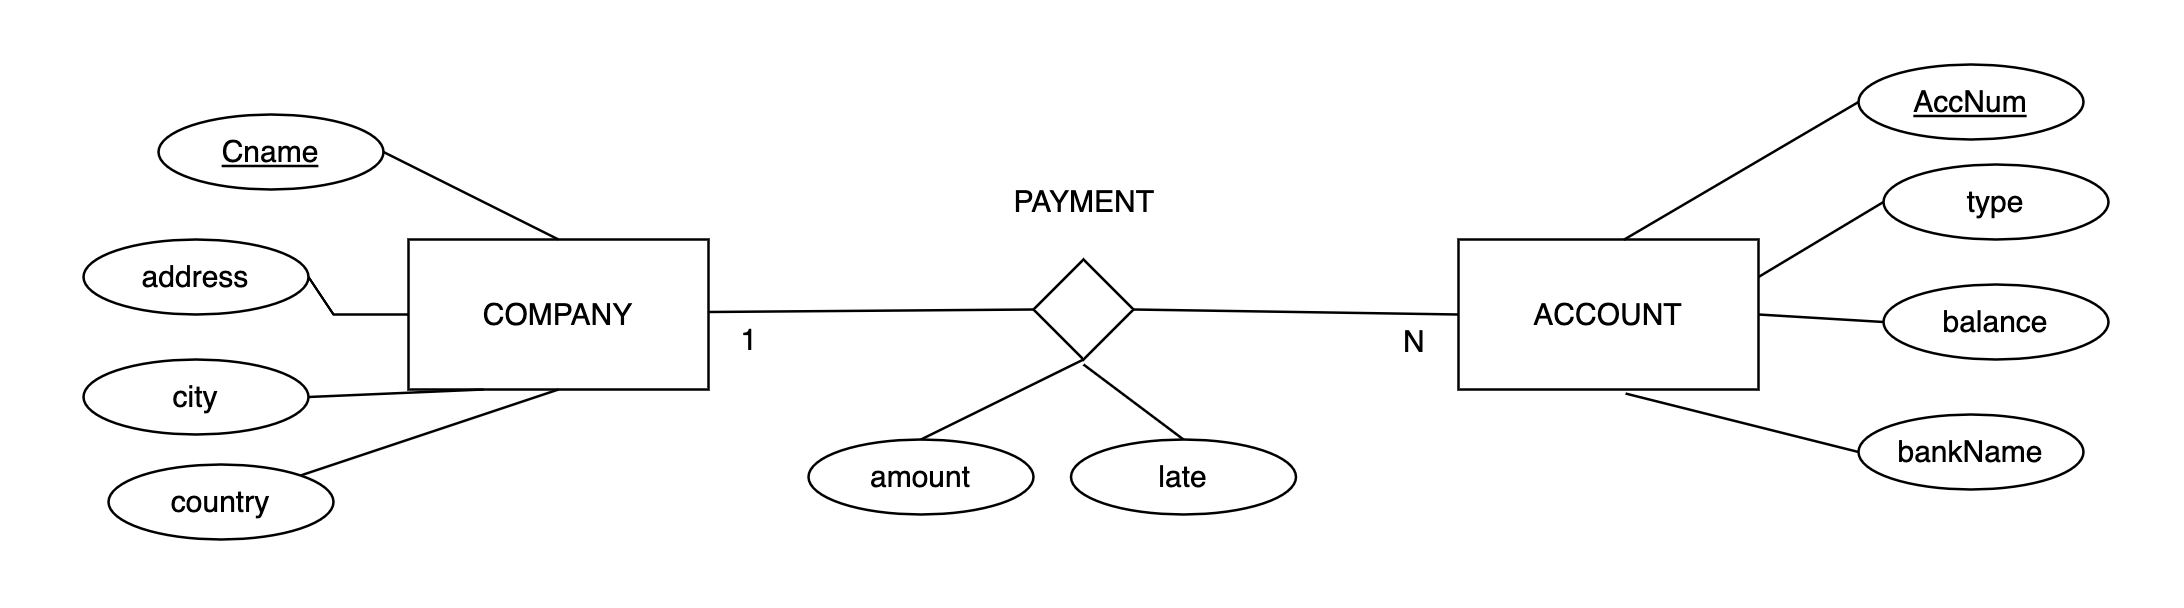

First we run the following code cells in order to create and insert data into the tables:

## Company

In [3]:
CREATE TABLE [1_COMPANY] (
    Cname VARCHAR(40) PRIMARY KEY,
    [Address] VARCHAR(25),
    City VARCHAR(15),
    Country VARCHAR(20)
);

INSERT INTO [1_COMPANY] (Cname, [Address], City, Country) VALUES
('Company A', '123 Main St', 'New York', 'USA'),
('Company B', '456 Elm St', 'London', 'UK'),
('Company C', '789 Pine Ave', 'Toronto', 'Canada'),
('Company D', '321 Oak Rd', 'Sydney', 'Australia'),
('Company E', '654 Maple Ln', 'Dublin', 'Ireland'),
('Company F', '987 Cedar Blvd', 'Berlin', 'Germany'),
('Company G', '246 Birch St', 'Paris', 'France'),
('Company H', '135 Walnut Dr', 'Madrid', 'Spain'),
('Company I', '864 Spruce Ct', 'Rome', 'Italy'),
('Company J', '975 Cherry Pl', 'Amsterdam', 'Netherlands'),
('Company K', '1122 Cedar Ave', 'Seoul', 'South Korea'),
('Company L', '2233 Oak Street', 'Beijing', 'China'),
('Company M', '3344 Birch Road', 'Cape Town', 'South Africa'),
('Company N', '4455 Elm Lane', 'Moscow', 'Russia'),
('Company O', '5566 Pine Path', 'Mexico City', 'Mexico');



(15 rows affected)

Total execution time: 00:00:00.023

## Account

In [4]:
CREATE TABLE [1_ACCOUNT] (
    AccNum INT PRIMARY KEY,
    [Type] VARCHAR(15),
    Balance FLOAT,
    BankName VARCHAR(20)
);
INSERT INTO [1_ACCOUNT] (AccNum, [Type], Balance, BankName) VALUES
(101, 'Savings', 5000.00, 'Bank A'),
(102, 'Checking', 1500.00, 'Bank B'),
(103, 'Savings', 7500.00, 'Bank C'),
(104, 'Checking', 3000.00, 'Bank D'),
(105, 'Savings', 2000.00, 'Bank E'),
(106, 'Checking', 10000.00, 'Bank F'),
(107, 'Savings', 5500.00, 'Bank G'),
(108, 'Checking', 8000.00, 'Bank H'),
(109, 'Savings', 4500.00, 'Bank I'),
(110, 'Checking', 6000.00, 'Bank J'),
(111, 'Savings', 3200.00, 'Bank K'),
(112, 'Checking', 2400.00, 'Bank L'),
(113, 'Savings', 5600.00, 'Bank M'),
(114, 'Checking', 7800.00, 'Bank N'),
(115, 'Savings', 9100.00, 'Bank O');



(15 rows affected)

Total execution time: 00:00:00.019

## Payment

In [5]:
CREATE TABLE [1_PAYMENT] (
    Cname VARCHAR(40),
    AccNum INT,
    Amount FLOAT,
    Late BIT,
    PRIMARY KEY (Cname, AccNum),
    FOREIGN KEY (Cname) REFERENCES [1_COMPANY](Cname),
    FOREIGN KEY (AccNum) REFERENCES [1_ACCOUNT](AccNum)
);
INSERT INTO [1_PAYMENT] (Cname, AccNum, Amount, Late) VALUES
('Company A', 101, 200.00, 0),
('Company B', 102, 450.00, 1),
('Company C', 103, 300.00, 0),
('Company D', 104, 500.00, 1),
('Company E', 105, 250.00, 0),
('Company F', 106, 600.00, 1),
('Company G', 107, 350.00, 0),
('Company H', 108, 700.00, 1),
('Company I', 109, 400.00, 0),
('Company J', 110, 800.00, 1),
('Company K', 111, 520.00, 0),
('Company L', 112, 630.00, 1),
('Company M', 113, 740.00, 0),
('Company N', 114, 850.00, 1),
('Company O', 115, 960.00, 0);

(15 rows affected)

Total execution time: 00:00:00.030

### 1\. Create a **CTE**, **temp table** and **view** that will store all information from the PAYMENT table.

In [6]:
-- CTE to extract all information from PAYMENT table
WITH cte_payment AS (
    SELECT *
    FROM [1_PAYMENT]
)
SELECT top 5 * --top 5 in SSMS is always put right after the SELECT key word and means to result in only the top 5 rows from the query
FROM cte_payment

(5 rows affected)

Total execution time: 00:00:00.025

Cname,AccNum,Amount,Late
Company A,101,200,0
Company B,102,450,1
Company C,103,300,0
Company D,104,500,1
Company E,105,250,0


In [7]:
-- Use CTE to extract the number of payments that are in the database
WITH cte_payment AS (
    SELECT *
    FROM [1_PAYMENT]
)
SELECT count(*) as TotalPayments
FROM cte_payment

(1 row affected)

Total execution time: 00:00:00.008

TotalPayments
15


In [8]:
-- Create temporary table to extract all information from PAYMENT table
SELECT *
INTO #temp_payment
FROM [1_PAYMENT];

-- Use temporary table
SELECT top 5 *
FROM #temp_payment

(15 rows affected)

(5 rows affected)

Total execution time: 00:00:00.013

Cname,AccNum,Amount,Late
Company A,101,200,0
Company B,102,450,1
Company C,103,300,0
Company D,104,500,1
Company E,105,250,0


In [21]:
-- Create VIEW to extract all information from PAYMENT table
CREATE VIEW view_payment AS (
    SELECT *
    FROM [1_PAYMENT]
);

go -- create command must be the only one in a batch - go separates the code into batches

-- Use view
SELECT top 5 *
FROM view_payment

Commands completed successfully.

(5 rows affected)

Total execution time: 00:00:00.011

Cname,AccNum,Amount,Late
Company A,101,200,0
Company B,102,450,1
Company C,103,300,0
Company D,104,500,1
Company E,105,250,0


### 2\. Define a CTE that will store payments for account number 104.

In [22]:
WITH cte_payment_account AS (
    SELECT *
    FROM [1_PAYMENT]
    WHERE AccNum=104
)
SELECT *
from cte_payment_account

(1 row affected)

Total execution time: 00:00:00.005

Cname,AccNum,Amount,Late
Company D,104,500,1


### 3\. Create a view that will store the companies’ names and their postal information (in a single attribute)

In [23]:
-- CREATE OR ALTER is used when we want to create a view or change an existing one (this is a combination of CREATE and ALTER commands)
CREATE OR ALTER VIEW company_view AS (
    SELECT *, 
        CONCAT([Address], ', ', City,', ', Country) as postal_info_concat,
        CONCAT_WS(' - ', [Address], City, Country) as postal_info_ws,
        [Address] + ', ' + City + ', ' + Country as postal_info
    FROM [1_COMPANY]
);
go
-- Use information from view
select top 5 * from company_view

Commands completed successfully.

(5 rows affected)

Total execution time: 00:00:00.015

Cname,Address,City,Country,postal_info_concat,postal_info_ws,postal_info
Company A,123 Main St,New York,USA,"123 Main St, New York, USA",123 Main St - New York - USA,"123 Main St, New York, USA"
Company B,456 Elm St,London,UK,"456 Elm St, London, UK",456 Elm St - London - UK,"456 Elm St, London, UK"
Company C,789 Pine Ave,Toronto,Canada,"789 Pine Ave, Toronto, Canada",789 Pine Ave - Toronto - Canada,"789 Pine Ave, Toronto, Canada"
Company D,321 Oak Rd,Sydney,Australia,"321 Oak Rd, Sydney, Australia",321 Oak Rd - Sydney - Australia,"321 Oak Rd, Sydney, Australia"
Company E,654 Maple Ln,Dublin,Ireland,"654 Maple Ln, Dublin, Ireland",654 Maple Ln - Dublin - Ireland,"654 Maple Ln, Dublin, Ireland"


### 4\. Using CTE, Temp table and View,  store the total number of payments made per country and the total amount paid in these payments.

In [25]:
-- Using CTE
with cte_company_payments as (
    SELECT Country, COUNT(*) as number_of_payments, SUM(Amount) as total_amount 
    FROM [1_PAYMENT] p
    INNER JOIN [1_COMPANY] c ON p.Cname = c.Cname
    GROUP BY Country
)
select top 2 'Using CTE' as Method, * from cte_company_payments order by number_of_payments desc

-- Using Temp table
SELECT Country, COUNT(*) as number_of_payments, SUM(Amount) as total_amount 
INTO #company_payments
FROM [1_PAYMENT] p
INNER JOIN [1_COMPANY] c ON p.Cname = c.Cname
GROUP BY Country

select top 2 'Using TEMP table' as Method, * from #company_payments order by number_of_payments desc;

-- Using View
GO
create view view_company_payments as (
    SELECT Country, COUNT(*) as number_of_payments, SUM(Amount) as total_amount 
    FROM [1_PAYMENT] p
    INNER JOIN [1_COMPANY] c ON p.Cname = c.Cname
    GROUP BY Country
)
GO

select top 2 'Using VIEW' as Method, * from view_company_payments order by number_of_payments desc;


(2 rows affected)

(15 rows affected)

(2 rows affected)

Commands completed successfully.

(2 rows affected)

Total execution time: 00:00:00.041

Method,Country,number_of_payments,total_amount
Using CTE,China,1,630
Using CTE,Canada,1,300


Method,Country,number_of_payments,total_amount
Using TEMP table,China,1,630
Using TEMP table,Canada,1,300


Method,Country,number_of_payments,total_amount
Using VIEW,China,1,630
Using VIEW,Canada,1,300


# Explicit JOINS

## CREATE TEST TABLES

In [26]:
CREATE TABLE test_table1 (
    ID INT, 
    Value VARCHAR(10)
);
INSERT INTO test_table1 (ID, Value)
VALUES (1,'First'), (2,'Second'), (3,'Third'), (4,'Forth'), (5,'Fifth');

CREATE TABLE test_table2 (
    ID INT, 
    Value VARCHAR(10)
);
INSERT INTO test_table2 (ID, Value)
VALUES (1,'First'), (2,'Second'), (3,'Third'), (6,'Sixth'), (7,'Seventh'), (8,'Eighth')

(5 rows affected)

(6 rows affected)

Total execution time: 00:00:00.021

## INNER JOIN

An INNER JOIN is one of the most commonly used types of joins in SQL. It is used to combine rows from two or more tables based on a condition that specifies how the tables are related.

How INNER JOIN Works

```
•	When performing an INNER JOIN, SQL compares each row in the first table with each row in the second table based on the join condition provided.
•	It retrieves only those rows where the join condition evaluates to TRUE. These rows are called “matching rows.”
•	Any rows in either table that do not meet the join condition are excluded from the result.

```

Key Characteristics of INNER JOIN:

```
1.	Matches Rows:
    •	Only rows with matching values in the specified columns are included in the result set.
2.	Excludes Non-Matching Rows:
    •	Rows from either table that do not satisfy the join condition are filtered out.
3.	Combine Data Across Tables:
    •	Allows data from related tables to be combined into a single result.

```

Joining Multiple Tables

```
•	An INNER JOIN can involve more than two tables. In such cases:
•	SQL evaluates the join conditions for all the tables.
•	A row is included in the result set only if it satisfies all the specified join conditions across all tables.

```

**Syntax for INNER JOIN:**

```
SELECT column_list
FROM table1
INNER JOIN table2 ON table1.column = table2.column;

```
```
SELECT column_list
FROM table1
INNER JOIN table2 ON table1.column = table2.column
INNER JOIN table3 ON table2.column = table3.column;

```

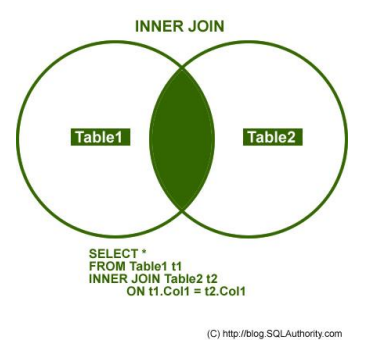 

Using the test tables:

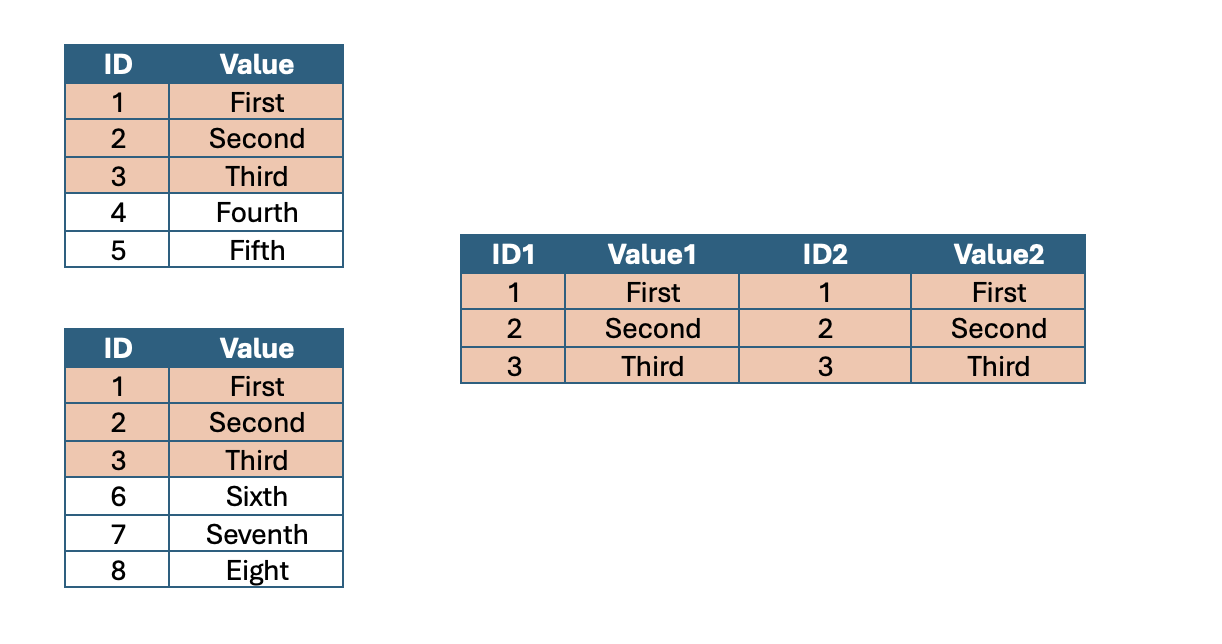

In [27]:
SELECT *
FROM test_table1 t1
INNER JOIN test_table2 t2 ON t1.ID = t2.ID

(3 rows affected)

Total execution time: 00:00:00.030

ID,Value,ID,Value
1,First,1,First
2,Second,2,Second
3,Third,3,Third


## LEFT OUTER JOIN

A LEFT OUTER JOIN is a type of join in SQL that retrieves all rows from the left table (the table listed before the JOIN keyword) and only the matching rows from the right table (the table listed after the JOIN keyword). If there is no match for a row in the left table, the result will still include the row, but with NULL values for the columns from the right table.

Key Characteristics of LEFT OUTER JOIN

```
1.	All Rows from Left Table:
    •	Every row from the left table appears in the result, regardless of whether it has a matching row in the right table.
2.	Matching Rows from Right Table:
    •	If a row in the left table has a match in the right table based on the join condition, the matching row is included in the result.
3.	NULL for Non-Matches:
    •	For rows in the left table that do not have a match in the right table, the corresponding columns from the right table are filled with NULL values.
4.	Table Positioning:
    •	The left and right tables are defined based on their position in the SQL statement:
    •	Left Table: Appears before the JOIN keyword.
    •	Right Table: Appears after the JOIN keyword.

```

**Syntax for LEFT OUTER JOIN:** (The keyword OUTER is optional, so you can write LEFT JOIN)

```
SELECT column_list
FROM left_table
LEFT JOIN right_table ON left_table.column = right_table.column;

```

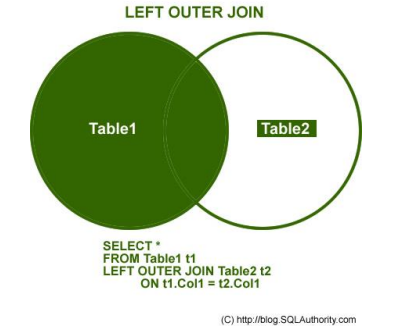

Using the test tables:

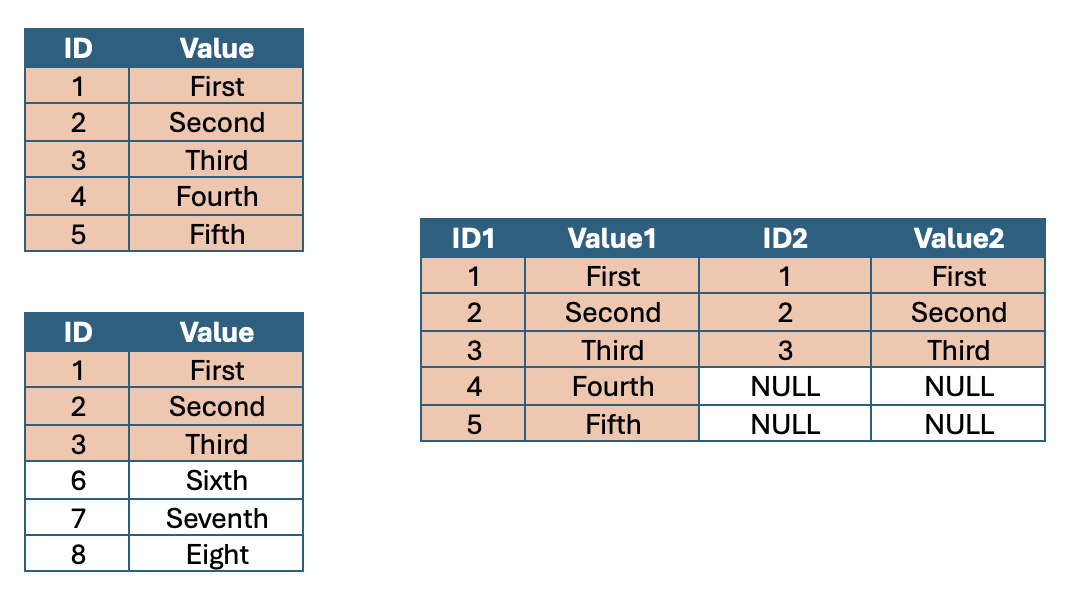

In [28]:
SELECT *
FROM test_table1 t1
LEFT JOIN test_table2 t2 ON t1.ID = t2.ID

(5 rows affected)

Total execution time: 00:00:00.024

ID,Value,ID,Value
1,First,1,First
2,Second,2,Second
3,Third,3,Third
4,Forth,NULL,NULL
5,Fifth,NULL,NULL


### ANTI-JOIN

An ANTI-JOIN is a type of query used to retrieve rows from one table (the left table) that do not have a corresponding match in another table (the right table). While SQL does not have a direct ANTI-JOIN keyword, its functionality can be achieved using specific techniques such as NOT EXISTS, NOT IN, or LEFT JOIN combined with a WHERE clause to filter unmatched rows.

In example:

In [29]:
SELECT t1.*, t2.*
FROM test_table1 t1
LEFT JOIN test_table2 t2 ON t1.ID = t2.ID -- join both tables using left join to have all of the left rows regardless if they have a pair on the right
WHERE t2.ID IS NULL -- from the join, remove the rows that are not matched on the right

--resulting in all of the rows present in the table on the left but missing in the table on the right

(2 rows affected)

Total execution time: 00:00:00.010

ID,Value,ID,Value
4,Forth,NULL,NULL
5,Fifth,NULL,NULL


## RIGHT OUTER JOIN

A RIGHT OUTER JOIN is similar to a LEFT OUTER JOIN, but with the focus reversed. Instead of including all rows from the left table, a RIGHT OUTER JOIN retrieves all rows from the right table and only the matching rows from the left table. If there is no match for a row in the right table, the result will still include the row, but the columns from the left table will contain NULL values.

Key Characteristics of RIGHT OUTER JOIN

```
1.	All Rows from the Right Table:
    •	Every row from the right table appears in the result, regardless of whether it has a matching row in the left table.
2.	Matching Rows from the Left Table:
    •	Only rows from the left table that satisfy the join condition are included in the result.
3.	NULL for Non-Matches:
    •	For rows in the right table that do not have a match in the left table, the corresponding columns from the left table will contain NULL.
4.	Table Positioning:
    •	The left and right tables are defined based on their position in the SQL statement:
    •	Right Table: Appears after the JOIN keyword.
    •	Left Table: Appears before the JOIN keyword.

```

**Syntax for RIGHT OUTER JOIN:** (The keyword OUTER is optional, so you can simply write RIGHT JOIN)

```
SELECT column_list
FROM left_table
RIGHT JOIN right_table ON left_table.column = right_table.column;

```

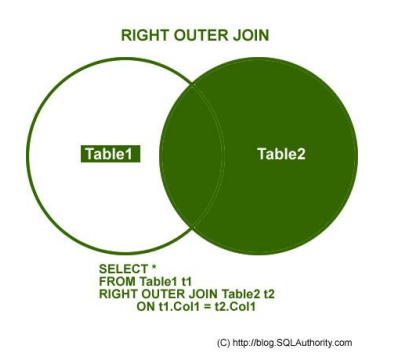

Using the test tables:

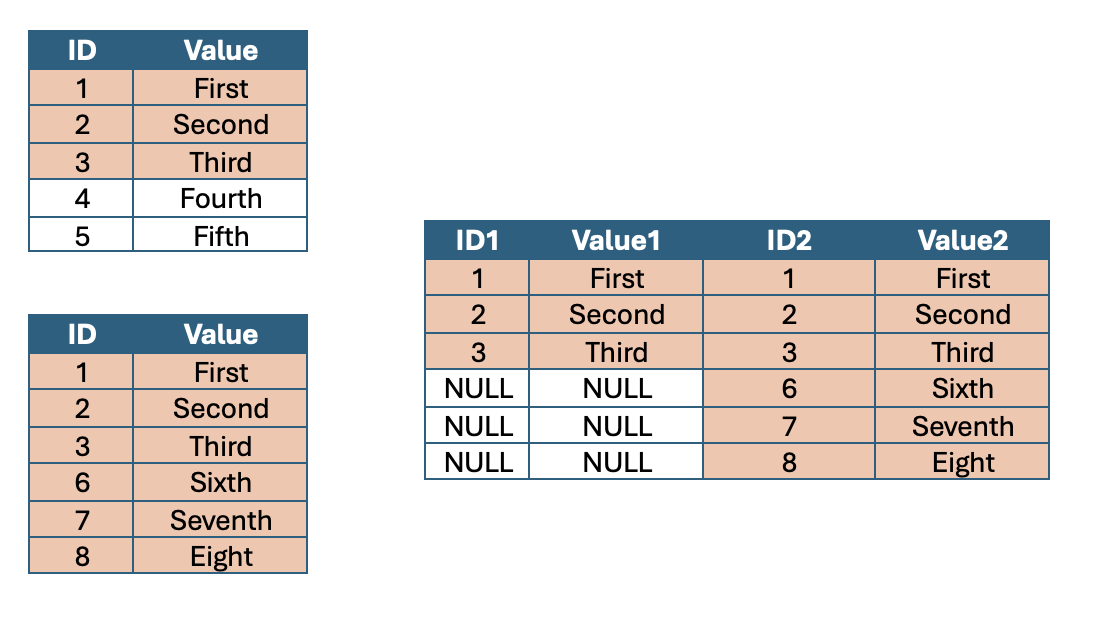

In [30]:
SELECT t1.*, t2.*
FROM test_table1 t1
RIGHT JOIN test_table2 t2 ON t1.ID = t2.ID

(6 rows affected)

Total execution time: 00:00:00.008

ID,Value,ID,Value
1,First,1,First
2,Second,2,Second
3,Third,3,Third
NULL,NULL,6,Sixth
NULL,NULL,7,Seventh
NULL,NULL,8,Eighth


In [31]:
SELECT *
FROM test_table2 t2
LEFT JOIN test_table1 t1 ON t1.ID = t2.ID

-- please note that right join is the same with left join when the tables are in reverse order

(6 rows affected)

Total execution time: 00:00:00.009

ID,Value,ID,Value
1,First,1,First
2,Second,2,Second
3,Third,3,Third
6,Sixth,NULL,NULL
7,Seventh,NULL,NULL
8,Eighth,NULL,NULL


## FULL OUTER JOIN

A FULL OUTER JOIN combines the results of both a LEFT OUTER JOIN and a RIGHT OUTER JOIN. It returns all rows from both tables, regardless of whether they satisfy the join condition. For rows that do not have a match in the other table, the columns from the non-matching table will contain NULL values.

Key Characteristics of FULL OUTER JOIN

```
1.	Includes All Rows:
    •	Returns all rows from both tables.
    •	If a row in one table does not have a match in the other table, the columns from the non-matching table will be filled with NULL.
2.	Combines LEFT and RIGHT OUTER JOINs:
    •	Retrieves:
    •	Rows that match based on the join condition.
    •	Rows from the left table without a match in the right table.
    •	Rows from the right table without a match in the left table.
3.	Symmetry:
    •	Both tables are treated equally, and the results include all unmatched rows from either table.

```

**Syntax for FULL OUTER JOIN:**

```
SELECT column_list
FROM Table1 t1
FULL OUTER JOIN Table2 t2 ON t1.column = t2.column;

```

In example, when a tuple from Table1 (aliased as t1) does not have a corresponding tuple in Table2 (aliased as t2), then t2.Id will be NULL, and vice versa.  
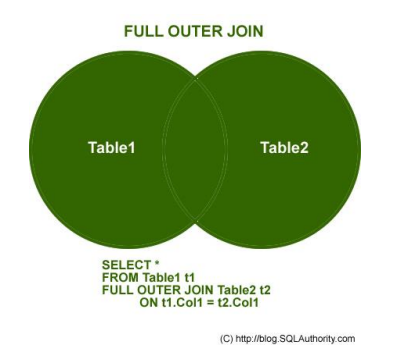

Using the test tables:

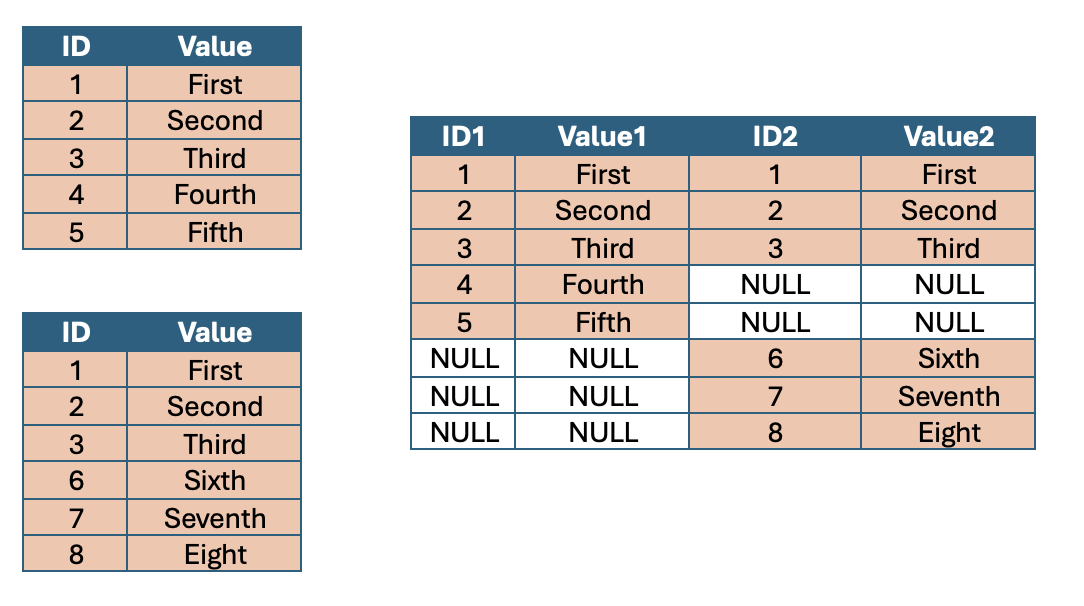

In [32]:
SELECT t1.*,t2.*
FROM test_table1 t1
FULL OUTER JOIN test_table2 t2 ON t1.ID = t2.ID

(8 rows affected)

Total execution time: 00:00:00.014

ID,Value,ID,Value
1,First,1,First
2,Second,2,Second
3,Third,3,Third
4,Forth,NULL,NULL
5,Fifth,NULL,NULL
NULL,NULL,6,Sixth
NULL,NULL,7,Seventh
NULL,NULL,8,Eighth


## CROSS JOIN

A CROSS JOIN is a type of join that produces a Cartesian product of two tables. It combines every row from the left table with every row from the right table, resulting in all possible combinations of rows from both tables.

Key Characteristics of CROSS JOIN

```
1.	No Join Condition:
    •	Unlike other joins, a CROSS JOIN does not require a join condition (e.g., ON clause).
2.	Cartesian Product:
    •	Every row in the left table is combined with every row in the right table.
    •	If the left table has m rows and the right table has n rows, the result will have m × n rows.
3.	Unrestricted Combination:
    •	Useful for scenarios where every possible pairing of rows is required.
4.	Explicit or Implicit Syntax:
    •	A CROSS JOIN can be explicitly specified or achieved implicitly by listing multiple tables in the FROM clause without a join condition.

```

**Syntax for CROSS JOIN:**

```
SELECT column_list
FROM table1
CROSS JOIN table2;
```
```
SELECT column_list
FROM table1, table2;
```

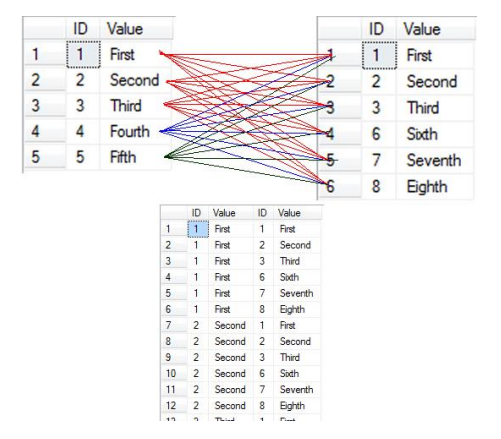

In [33]:
SELECT t1.*,t2.*
FROM test_table1 t1
CROSS JOIN test_table2 t2

(30 rows affected)

Total execution time: 00:00:00.018

ID,Value,ID,Value
1,First,1,First
1,First,2,Second
1,First,3,Third
1,First,6,Sixth
1,First,7,Seventh
1,First,8,Eighth
2,Second,1,First
2,Second,2,Second
2,Second,3,Third
2,Second,6,Sixth


# PROBLEM 2

A company database is made up of the following relations:

- Model (<u>Id</u>, Name, Description)
- Size (<u>Id</u>,Name,Description)
- Color (<u>Id</u>,Name)
- StoreProduct (<u>Id</u>, ModelId\*, SizeId\*, ColorId\*, RetailPrice, ItemsOnStock)
- FactoryProduct (<u>Id</u>, ModelId\*, SizeId\*, ColorId\*, FactoryPrice)

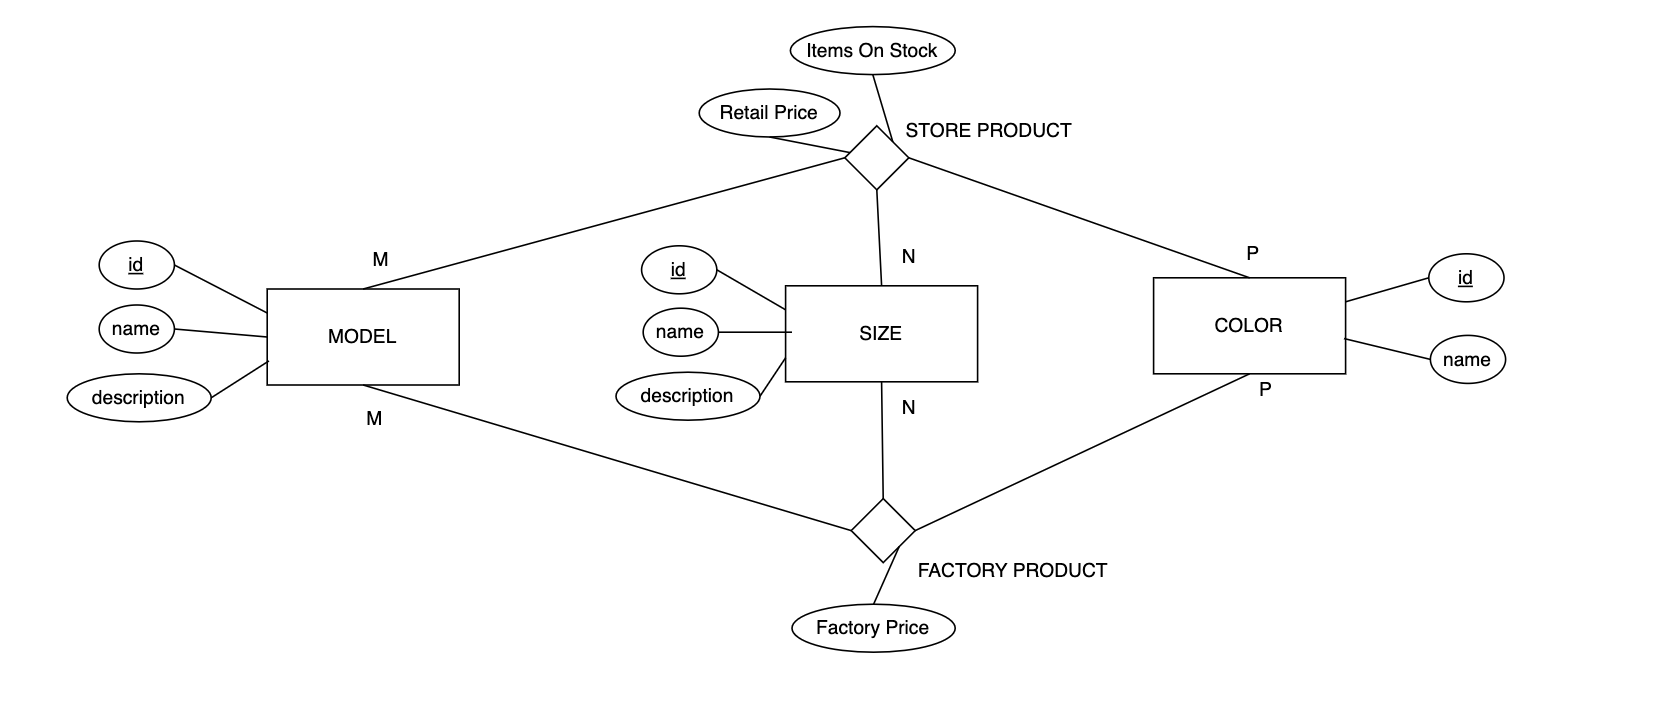

In [ ]:
create table [2_Model](
    Id int identity primary key,
    [Name] nvarchar(100) not null,
    [Description] nvarchar(200) null
); 
GO
create table [2_Size](
    Id int identity primary key,
    [Name] nvarchar(100) not null,
    [Description] nvarchar(200) null
); 
GO
create table [2_Color](
    Id int identity primary key,
    [Name] nvarchar(100) not null
); 
GO

create table [2_StoreProduct](
    Id int identity primary key,
    ModelId int null references [2_Model](Id) on delete set null on update cascade,
    SizeId int null references [2_Size](Id) on delete set null on update cascade,
    ColorId int null references [2_Color](Id) on delete set null on update cascade,
    RetailPrice float not null default 0,
    ItemsOnStock int not null default 0
); 
GO

create table [2_FactoryProduct](
    Id int identity primary key,
    ModelId int null references [2_Model](Id) on delete set null on update cascade,
    SizeId int null references [2_Size](Id) on delete set null on update cascade,
    ColorId int null references [2_Color](Id) on delete set null on update cascade,
    FactoryPrice float not null default 0
); 
GO

insert into [2_Model]([Name])
values ('Jeans'), ('Shirt')
GO
insert into [2_Color]([Name])
values ('Blue'), ('Yellow'), ('Red')
GO
insert into [2_Size]([Name])
values ('S'), ('M'), ('L')
GO

### 1\. The FactoryProduct table is empty and should be populated with all possible combinations of models, sizes and color that the factory can produce.

In [35]:
INSERT INTO [2_FactoryProduct] (ModelId, ColorId, SizeId) 
    SELECT m.Id, c.Id, s.Id -- mention the columns
    FROM [2_model] m
    CROSS JOIN [2_color] c 
    CROSS JOIN [2_size] s

UPDATE [2_FactoryProduct]
SET FactoryPrice=50*ModelId*SizeId*ColorId; --set a formula to be calculated for the value of the column
GO


-- We will also populate the StoreProduct table by partially replicating the tuples from FactoryProduct table.

INSERT INTO [2_StoreProduct](ModelId,SizeId,ColorId,RetailPrice,ItemsOnStock)
    SELECT ModelId, SizeId, ColorId,
    100*ModelId*SizeId*ColorId as RetailPrice,
    ModelId+SizeId+ColorId as ItemsOnStock
    from [2_FactoryProduct] fp
    where (ModelId+SizeId+ColorId) % 3 = 0; --in order to get not all products 

GO 



(18 rows affected)

(18 rows affected)

(6 rows affected)

Total execution time: 00:00:00.049

### 2\. Find the products produced by the factory which are not present in the store.

In [36]:
SELECT fp.*
FROM [2_FactoryProduct] fp
LEFT JOIN [2_StoreProduct] sp ON fp.ModelId = sp.ModelId AND fp.SizeId = sp.SizeId AND fp.ColorId = sp.ColorId --join on all foreign keys
where sp.Id IS NULL --anti-join 

(12 rows affected)

Total execution time: 00:00:00.031

Id,ModelId,SizeId,ColorId,FactoryPrice
2,1,1,2,100
3,1,1,3,150
4,1,2,1,100
5,1,2,2,200
7,1,3,1,150
9,1,3,3,450
10,2,1,1,100
11,2,1,2,200
13,2,2,1,200
15,2,2,3,600


### 3\. Show the percentage of red products that are present in the store. (compared with all red products in the factory)

In [37]:
with cte_red_records as (
    SELECT COUNT(c.Id) as red_records
    FROM [2_StoreProduct] sp
    JOIN [2_Color] c ON sp.ColorId=c.Id
    WHERE c.Name='Red'
),
cte_cnt_records as (
    SELECT COUNT(*) as cnt_records
    FROM [2_FactoryProduct] fp
    JOIN [2_Color] c on fp.ColorId=c.Id
    WHERE c.Name='Red'
)
SELECT cte_red_records.red_records*1.0/cte_cnt_records.cnt_records as NotFormated,
    cast(cast(cte_red_records.red_records*1.0/cte_cnt_records.cnt_records as decimal(10,2)) as varchar) + ' %' as RedProductsPercentage
    --round the formula to 2 decimal places, then cast all of that into varchar in order to concat to a % symbol
FROM cte_cnt_records, cte_red_records

(1 row affected)

Total execution time: 00:00:00.021

NotFormated,RedProductsPercentage
0.333333333333,0.33 %


### 4\. The factory decides to terminate the production of yellow products due to change in fashion trends; hence all such products need to be removed from the FactoryProduct table.

In [38]:
-- always select and filter records before deletion in order to check the query
SELECT *
FROM [2_FactoryProduct] fp  
JOIN [2_Color] c on fp.ColorId=c.Id
WHERE [name]='yellow';


DELETE [2_FactoryProduct]
FROM [2_FactoryProduct] fp 
JOIN [2_Color] c on fp.ColorId=c.Id
WHERE [name]='yellow';


--TRUNCATE TABLE [2_FactoryProduct]; -- clear all records from a table but keep the tables structure

--DROP TABLE [2_FactoryProduct]; -- delete a table and all records from it


(6 rows affected)

(6 rows affected)

Total execution time: 00:00:00.019

Id,ModelId,SizeId,ColorId,FactoryPrice,Id,Name
2,1,1,2,100,2,Yellow
5,1,2,2,200,2,Yellow
8,1,3,2,300,2,Yellow
11,2,1,2,200,2,Yellow
14,2,2,2,400,2,Yellow
17,2,3,2,600,2,Yellow


### 5\. Find the products which are still present in the store, but the factory no longer produces.

In [39]:
SELECT *
FROM [2_StoreProduct] sp 
LEFT JOIN [2_FactoryProduct] fp ON fp.ModelId=sp.ModelId AND fp.SizeId=sp.SizeId AND fp.ColorId=sp.ColorId
WHERE fp.ID IS NULL

(2 rows affected)

Total execution time: 00:00:00.014

Id,ModelId,SizeId,ColorId,RetailPrice,ItemsOnStock,Id,ModelId,SizeId,ColorId,FactoryPrice
3,1,3,2,600,6,NULL,NULL,NULL,NULL,NULL
5,2,2,2,800,6,NULL,NULL,NULL,NULL,NULL


### 6\. Find all the products that the company (factory plus store) has at its disposal.

In [40]:
SELECT ModelId, SizeId, ColorId
FROM [2_FactoryProduct]

UNION -- no duplicates -> UNION ALL returns all records including duplicates from both queries

SELECT ModelId, SizeId, ColorId
FROM [2_StoreProduct]

(14 rows affected)

Total execution time: 00:00:00.008

ModelId,SizeId,ColorId
1,1,1
1,1,3
1,2,1
1,2,3
1,3,1
1,3,2
1,3,3
2,1,1
2,1,3
2,2,1


In [41]:
SELECT ModelId, SizeId, ColorId
FROM [2_FactoryProduct]

UNION ALL -- duplicates included

SELECT ModelId, SizeId, ColorId
FROM [2_StoreProduct]

(18 rows affected)

Total execution time: 00:00:00.007

ModelId,SizeId,ColorId
1,1,1
1,1,3
1,2,1
1,2,3
1,3,1
1,3,3
2,1,1
2,1,3
2,2,1
2,2,3


The function **CASE** has the following syntax:

> CASE expression

> > WHEN condition1 THEN result1
> > 
> > WHEN condition2 THEN result2
> > 
> > ...
> > 
> > WHEN conditionN THEN resultN

> <span style="background-color: rgba(127, 127, 127, 0.1); font-family: -apple-system, BlinkMacSystemFont, sans-serif; color: var(--vscode-foreground);">END</span>

<span style="font-family: -apple-system, BlinkMacSystemFont, sans-serif; color: var(--vscode-foreground);">it behaves exactly like the SWITCH function in C, i.e., it represents a choice among multiple possibilities, where the specified conditions are evaluated sequentially as they are listed, and each subsequent condition excludes all previous ones. If no condition is met, the result will be the one specified in the ELSE option. If the ELSE option is not specified and no condition is met, the function returns NULL.</span>

The function **ISNULL (arg1, arg2)** is used when we want to define a mask for NULL values in the result. The function checks if arg1 is NULL; if it is not NULL it returns its value, and if it is NULL then it returns the value of arg2.

### 7\. Retrieve the difference between the factory and retail price for all products present in both the factory and store, or the factory price for product present only in the factory, or the retail price for products present only in the store.

In [42]:
SELECT fp.FactoryPrice, sp.RetailPrice,
    CASE 
         WHEN fp.ID IS NULL THEN sp.RetailPrice
         WHEN sp.ID IS NULL THEN fp.FactoryPrice
         ELSE sp.RetailPrice - fp.FactoryPrice
    END as price_difference
FROM [2_FactoryProduct] fp
FULL OUTER JOIN [2_StoreProduct] sp ON fp.ModelId=sp.ModelId AND fp.SizeId=sp.SizeId AND fp.ColorId=sp.ColorId

(14 rows affected)

Total execution time: 00:00:00.017

FactoryPrice,RetailPrice,price_difference
50,100,50
150,NULL,150
100,NULL,100
300,600,300
150,NULL,150
450,NULL,450
100,NULL,100
300,600,300
200,NULL,200
600,NULL,600


### 8\. Double the amount of items in stock for all blue products.

In [43]:
SELECT *
FROM [2_StoreProduct] sp 
JOIN [2_Color] c ON sp.ColorId=c.Id
where c.Name='Blue';


UPDATE [2_StoreProduct]
SET ItemsOnStock = ItemsOnStock * 2
FROM [2_StoreProduct] sp 
JOIN [2_Color] c ON sp.ColorId=c.Id
where c.Name='Blue';


SELECT *
FROM [2_StoreProduct] sp 
JOIN [2_Color] c ON sp.ColorId=c.Id
where c.Name='Blue';

(2 rows affected)

(2 rows affected)

(2 rows affected)

Total execution time: 00:00:00.021

Id,ModelId,SizeId,ColorId,RetailPrice,ItemsOnStock,Id,Name
1,1,1,1,100,3,1,Blue
6,2,3,1,600,6,1,Blue


Id,ModelId,SizeId,ColorId,RetailPrice,ItemsOnStock,Id,Name
1,1,1,1,100,6,1,Blue
6,2,3,1,600,12,1,Blue


# Problem 3

A database is made up of the following relations:

- PASSENGER (<u>passportNo</u>, name, surname, street, number, city, telephone)
- FLIGHT\_LINE (<u>line\_code</u>, from, to, depart\_time, arrive\_time)
- FLIGHT (<u>line\_code\*, flightNo</u>, date)
- RESERVATION (<u>passportNo\*, line\_code\*, flightNo\*, date</u>)
- EMPLOYEE (<u>code</u>, name, surname, salary)
- CREW (<u>line\_code\*, flightNo\*, employeeCode\*</u>)
- PILOT (<u>code\*</u>)
- PLANE\_TYPE (<u>modelNo</u>, manufacturer, modelName)
- PLANE (<u>serialNo, modelNo\*</u>, capacity, airworthiness)
- CAN\_FLY (<u>pilotCode\*, modelNo\*</u>)

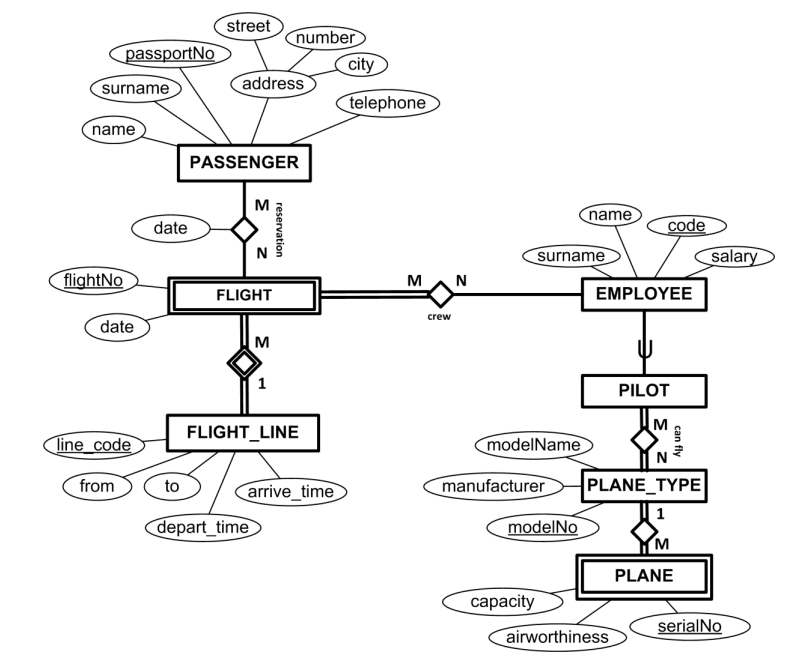

Create the database tables

In [ ]:
create table [3_PASSENGER] (
    passportNo varchar(10) PRIMARY KEY, 
    [name] varchar(20), 
    surname varchar(20), 
    street varchar(50), 
    [number] int, 
    city varchar(20), 
    telephone varchar(20)
);
GO
create table [3_FLIGHT_LINE] (
    line_code varchar(10) PRIMARY KEY, 
    [from] varchar(20), 
    [to] varchar(20), 
    depart_time varchar(5), 
    arrive_time varchar(5)
);
GO
create table [3_FLIGHT] (
    line_code varchar(10), 
    flightNo varchar(10), 
    [date] date,
    PRIMARY KEY (line_code, flightNo),
    FOREIGN KEY (line_code) REFERENCES [3_FLIGHT_LINE](line_code)
);
GO
CREATE TABLE [3_RESERVATION] (
    passportNo varchar(10), 
    line_code varchar(10), 
    flightNo varchar(10), 
    [date] date,
    PRIMARY KEY (passportNo, line_code, flightNo, [date]),
    FOREIGN KEY (passportNo) REFERENCES [3_PASSENGER](passportNo),
    FOREIGN KEY (line_code, flightNo) REFERENCES [3_FLIGHT](line_code, flightNo)
);
GO
CREATE TABLE [3_EMPLOYEE] (
    code int PRIMARY KEY, 
    [name] varchar(20), 
    surname varchar(20), 
    salary int
);
GO
CREATE TABLE [3_CREW] (
    line_code varchar(10), 
    flightNo varchar(10), 
    employeeCode int,
    PRIMARY KEY (line_code, flightNo, employeeCode),
    FOREIGN KEY (line_code, flightNo) REFERENCES [3_FLIGHT](line_code, flightNo),
    FOREIGN KEY (employeeCode) REFERENCES [3_EMPLOYEE](code)
);
GO
CREATE TABLE [3_PILOT] (
    code int PRIMARY KEY,
    FOREIGN KEY (code) REFERENCES [3_EMPLOYEE](code)
);
GO
CREATE TABLE [3_PLANE_TYPE] (
    modelNo varchar(10) PRIMARY KEY, 
    manufacturer varchar(20), 
    modelName varchar(20)
);
GO
CREATE TABLE [3_PLANE] (
    serialNo varchar(10), 
    modelNo varchar(10), 
    capacity int, 
    airworthiness varchar(50),
    PRIMARY KEY(serialNo, modelNo),
    FOREIGN KEY (modelNo) REFERENCES [3_PLANE_TYPE](modelNo)
);
GO
CREATE TABLE [3_CAN_FLY] (
    pilotCode int, 
    modelNo varchar(10),
    PRIMARY KEY (pilotCode, modelNo),
    FOREIGN KEY (pilotCode) REFERENCES [3_PILOT] (code),
    FOREIGN KEY (modelNo) REFERENCES [3_PLANE_TYPE] (modelNo)
);

Insert data into the tables

In [ ]:
INSERT INTO [3_PASSENGER] (passportNo, [name], surname, street, [number], city, telephone)
VALUES 
('P123456789', 'John', 'Doe', 'Main St', 101, 'New York', '555-1234'),
('P987654321', 'Jane', 'Smith', 'Broadway', 202, 'Los Angeles', '555-5678'),
('P456789123', 'Alice', 'Johnson', 'Elm St', 303, 'Chicago', '555-8765'),
('P654321987', 'Bob', 'Brown', 'Oak St', 404, 'Houston', '555-4321'),
('P321654987', 'Charlie', 'Williams', 'Pine St', 505, 'Phoenix', '555-6789');
GO
INSERT INTO [3_FLIGHT_LINE] (line_code, [from], [to], depart_time, arrive_time)
VALUES
('L001', 'New York', 'Los Angeles', '08:00', '11:00'),
('L002', 'Chicago', 'Houston', '09:30', '12:30'),
('L003', 'Phoenix', 'New York', '07:00', '14:00'),
('L004', 'Los Angeles', 'Chicago', '13:00', '17:00'),
('L005', 'Houston', 'Phoenix', '15:30', '18:30');
GO
INSERT INTO [3_FLIGHT] (line_code, flightNo, [date])
VALUES
('L001', 'F101', '2023-12-01'),
('L002', 'F102', '2023-12-02'),
('L003', 'F103', '2023-12-03'),
('L004', 'F104', '2023-12-04'),
('L005', 'F105', '2023-12-25');
GO
INSERT INTO [3_RESERVATION] (passportNo, line_code, flightNo, [date])
VALUES
('P123456789', 'L001', 'F101', '2023-12-01'),
('P987654321', 'L002', 'F102', '2023-12-02'),
('P456789123', 'L003', 'F103', '2023-12-03'),
('P654321987', 'L004', 'F104', '2023-12-04'),
('P321654987', 'L005', 'F105', '2023-12-25'),
('P456789123', 'L005', 'F105', '2023-12-25');
GO
INSERT INTO [3_EMPLOYEE] (code, [name], surname, salary)
VALUES
(1, 'Paul', 'White', 50000),
(2, 'Susan', 'Green', 55000),
(3, 'David', 'Blue', 60000),
(4, 'Linda', 'Black', 62000),
(5, 'Mark', 'Gray', 58000),
(6, 'David', 'Yellow', 45000),
(7, 'Sarah', 'Gray', 52000);
GO
INSERT INTO [3_CREW] (line_code, flightNo, employeeCode)
VALUES
('L001', 'F101', 1),
('L001', 'F101', 3),
('L002', 'F102', 2),
('L002', 'F102', 4),
('L003', 'F103', 2),
('L003', 'F103', 4),
('L004', 'F104', 1),
('L004', 'F104', 3),
('L005', 'F105', 3),
('L005', 'F105', 1);
GO
INSERT INTO [3_PILOT] (code)
VALUES
(3),
(4),
(5),
(6),
(7);
GO
INSERT INTO [3_PLANE_TYPE] (modelNo, manufacturer, modelName)
VALUES
('PT01', 'Boeing', '737'),
('PT02', 'Airbus', 'A320'),
('PT03', 'Cessna', 'Citation X'),
('PT04', 'Boeing', '747'),
('PT05', 'Airbus', 'A380');
GO
INSERT INTO [3_PLANE] (serialNo, modelNo, capacity, airworthiness)
VALUES
('SN001', 'PT01', 200, 'Certified'),
('SN002', 'PT02', 180, 'Certified'),
('SN003', 'PT03', 12, 'Certified'),
('SN004', 'PT04', 350, 'Certified'),
('SN005', 'PT05', 550, 'Certified');
GO
INSERT INTO [3_CAN_FLY] (pilotCode, modelNo)
VALUES
(4, 'PT01'),
(4, 'PT02'),
(3, 'PT03'),
(3, 'PT04'),
(5, 'PT05');

## <span style="font-family: -apple-system, BlinkMacSystemFont, sans-serif; color: var(--vscode-foreground);">1. Retrieve the names of all passengers that don’t have a flight on 25.12.2023.&nbsp;</span>

In [46]:
-- Using TEMP table
select r.passportNo, r.flightNo
into #res_flight
from [3_RESERVATION] r 
join [3_FLIGHT] fl on r.flightNo = fl.flightNo
where fl.date = '2023-12-25'

select pa.name, pa.surname
from [3_PASSENGER] pa 
left join #res_flight rf on rf.passportNo = pa.passportNo
where rf.flightNo is null

(2 rows affected)

(3 rows affected)

Total execution time: 00:00:00.044

name,surname
John,Doe
Bob,Brown
Jane,Smith


In [47]:
-- Using CTE
with res_flight as (
    select r.passportNo, r.flightNo
    from [3_RESERVATION] r 
    join [3_FLIGHT] fl on r.flightNo = fl.flightNo
    where fl.date = '2023-12-25'
)
select pa.name, pa.surname
from [3_PASSENGER] pa 
left join res_flight rf on rf.passportNo = pa.passportNo
where rf.flightNo is null

(3 rows affected)

Total execution time: 00:00:00.013

name,surname
John,Doe
Bob,Brown
Jane,Smith


In [ ]:
-- Using VIEW

-- We will not solve this query using VIEW because it has a very specific condition and the possibility of reusing the view is very low

##  2. Show the total number of flights for each pilot including those that have no flights.

In [48]:
select p.code as PilotCode, count(c.line_code) as NumberOfFlights
from [3_CREW] c 
right join [3_PILOT] p on p.code = c.employeeCode
group by p.code
order by p.code

(5 rows affected)

Total execution time: 00:00:00.025

PilotCode,NumberOfFlights
3,3
4,2
5,0
6,0
7,0


## 3\. Retrieve the passport numbers of all passengers that have taken flights operated by the pilot with code 3.

In [ ]:
--All pilots with flights 
create view pilot_flight (code, line_code, flightNo) as
select p.code, c.line_code, c.flightNo
from [3_CREW] c 
join [3_PILOT] p on p.code = c.employeeCode
go
--All passengers with flights
create view passenger_flight (passportNo, line_code, flightNo) as
select p.passportNo, r.line_code, r.flightNo
from [3_PASSENGER] p 
join [3_RESERVATION] r on p.passportNo = r.passportNo

In [50]:
select distinct passportNo
from passenger_flight paf 
join pilot_flight pif on paf.line_code = pif.line_code and paf.flightNo = pif.flightNo
where pif.code = 3

(4 rows affected)

Total execution time: 00:00:00.039

passportNo
P123456789
P321654987
P456789123
P654321987


## 4\. Retrieve the passport numbers of all passengers that have taken no flights operated by the pilot with code 3.

In [51]:
-- We will use the views created previously
select distinct passportNo
from passenger_flight paf 
join pilot_flight pif on paf.line_code = pif.line_code and paf.flightNo = pif.flightNo
where pif.code <> 3

(2 rows affected)

Total execution time: 00:00:00.019

passportNo
P456789123
P987654321
